In [ ]:
#------------------------------------------------------------------------------------------------------------------
#                                               icdar
#------------------------------------------------------------------------------------------------------------------

In [8]:
# public imports
import numpy as np

# priv imports
import sys
from importlib import reload
p_code="/home/paintedpalms/rdrive/taff/code"
sys.path.insert(0,p_code)
import omega
reload (omega)
from omega import *


#------------------------------------------------------------------------------------------------------------------
# check ratio formula
#------------------------------------------------------------------------------------------------------------------

if 1==0:
    
    print(get_score_ratio(0,0))
    print(get_score_ratio(1,1))
    print(get_score_ratio(0.10001,0.10002)) # 0
    print(get_score_ratio(0.00001,0.00002)) # 1
    print(get_score_ratio(0.10001,0.00002)) # 1.5
    print(get_score_ratio(0.00001,0)) # 2
    print(get_score_ratio(0.10001,0)) # 3

## data : magazine
    
if 1==0:

    # get raw data from magazine
    n_assets=3
    p="/home/paintedpalms/rdrive/taff/code/data/MagLayout/layoutdata/annotations"
    names=os.listdir(p)
    name = names[0]
    bboxes_mag=[]
    for name in names:
        p_xml=p+"/"+name
        h,w,bboxes,ok=get_bboxes_mag(p_xml)
        if len(bboxes)==n_assets:
            bboxes_mag.append(bboxes)
    y_gan_mag=get_y_gan_from_bboxes(bboxes_mag,"y_gan")
    p_data="/home/paintedpalms/rdrive/taff/code/data"
    np.save(p_data+"/y_gan_mag_3elems.npy",y_gan_mag)

## eval : process

def preprocess_layouts_for_eval(preal,pgen,w):
    npa_gen=np.load(pgen)[:1000]
    bbox_samples_gen=get_bboxes_from_y_gan2(npa_gen,"y_gan")
    n=len(bbox_samples_gen)
    if 1==0:n_assets_real=get_nb_of_assets(preal)
    yreal=shuffle_sub(np.load(preal),n)
    bbox_samples_real=get_bboxes_from_y_gan2(yreal,"y_gan")
    return bbox_samples_real,bbox_samples_gen

## eval : prints

def print_scores(s1,s2,w,h,option,nround):
    if s2=="":
        name1="real"
        name2="gen"
        p1=apreal(s1)
        p2=apgen(s1)
    if s2!="":
        name1="real"
        name2="real"
        p1=apreal(s1)
        p2=apreal(s2)
    bbox_samples1,bbox_samples2=preprocess_layouts_for_eval(p1,p2,w)
    if option=="align":
        score1=get_layouts_alignment_score_a16(bbox_samples1,w)
        score2=get_layouts_alignment_score_a16(bbox_samples2,w)
        score_comp=get_comparative_score(score1,score2)
    if option=="over":
        score1=get_layouts_overlap_score(bbox_samples1,w,h,"")
        score2=get_layouts_overlap_score(bbox_samples2,w,h,"")
        score_comp=get_comparative_score(score1,score2)
    if option=="div":
        na1=get_nb_of_assets(p1)
        na2=get_nb_of_assets(p2)
        score1,score2,score_comp=get_layouts_diversity_ratio2(bbox_samples1,bbox_samples2,w,h,na1,na2)
    print(get_header(s1,name1,s2,name2),"\t",option,"\t",get_score(score1,nround),"\t",get_score(score2,nround),"\t",get_score(score_comp,nround))

def get_header(s1,name1,s2,name2):
    while len(s1)<15:s1+=" "
    while len(s1)<15:s2+=" "
    if s2=="":s=str(s1)+" "+str(name1)+" "+str(name2)
    if s2!="":s=str(s1)+" "+str(name1)+" "+str(s2)+" "+str(name2)
    return s
    
def get_score(score,nround):
    score=np.round(score,nround)
    score=str(score)
    while len(score)<nround+2:score+=" "
    return score

## eval : visuals
    
def get_layout_images(pdata,w,h,n,option):
    # get images
    option_color=1
    npa=shuffle_sub(np.load(pdata),n)
    npa_images=get_images_from_layout_npa(npa,w,h,n,option_color)
    if option==1:return npa_images
    if option==2:return get_images_from_npa(npa_images)

def save_images(pnpa,pim,w,h,n):
    if os.path.exists(pim)==False:os.makedirs(pim)
    images=get_layout_images(pnpa,w,h,n,2)
    for i in range(n):
        images[i].save(pim+"/"+str(i)+".png")

def display_images(pnpa,w,h,n):
    images=get_layout_images(pnpa,w,h,n,2)
    for i in range(n):
        display(images[i])
        
def save_images_icdar(name,w,h,n): 
    save_images(apreal(name),apimreal(name),w,h,n)
    save_images(apgen(name),apimgen(name),w,h,n)
        
def print_fid(s1,s2,w,h,n):
    if s2=="":
        name1="real"
        name2="gen"
        p1=apreal(s1)
        p2=apgen(s1)
    if s2!="":
        name1="real"
        name2="real"
        p1=apreal(s1)
        p2=apreal(s2)
    images1=get_layout_images(p1,w,h,n,1)
    images2=get_layout_images(p1,w,h,n,1)
    score=get_fid(images1,images2,0)
    print(get_header(s1,name1,s2,name2),"fid",score)
        
## data # 300,600 # 1440,2560

def apreal(name):return "/home/paintedpalms/rdrive/taff/code/data/icdar/"+name+"_real.npy"
def apgen(name):return "/home/paintedpalms/rdrive/taff/code/data/icdar/"+name+"_gen.npy"
def apimreal(name):return "/home/paintedpalms/rdrive/taff/code/results/icdar/"+name+"/real"
def apimgen(name):return "/home/paintedpalms/rdrive/taff/code/results/icdar/"+name+"/gen"

In [ ]:
## results : fid

# rico_train_low real gen fid 3.045744882999203
# rico_train_high real gen fid 2.9906582974738383
# synth2_train_low real gen fid 2.720886782997022
# synth2_train_high real gen fid 2.6721124211990226
# rico_align_low real gen fid 3.6431043489117765
# rico_align_high real gen fid 5.988714371055343
# rico_over_low real gen fid 5.350570603987279
# rico_over_high real gen fid 4.697188905655879
# synth2_div_low real gen fid 1.843801529109005
# synth2_div_high real gen fid 2.917188528184041
# synth2_nassets_3 real gen fid 2.703827064264819
# synth2_nassets_5 real gen fid 4.32063949420442
# synth2_nassets_7 real gen fid 4.163920769407158

print_fid("rico_train_low","",1440,2560,1000)
print_fid("rico_train_high","",1440,2560,1000)
print_fid("synth2_train_low","",300,600,1000)
print_fid("synth2_train_high","",300,600,1000)
print_fid("rico_align_low","",1440,2560,1000)
print_fid("rico_align_high","",1440,2560,1000)
print_fid("rico_over_low","",1440,2560,1000)
print_fid("rico_over_high","",1440,2560,1000)
print_fid("synth2_div_low","",300,600,1000)
print_fid("synth2_div_high","",300,600,1000)
print_fid("synth2_nassets_3","",300,600,1000)
print_fid("synth2_nassets_5","",300,600,1000)
print_fid("synth2_nassets_7","",300,600,1000)

In [22]:
## data

# priv imports
import sys
from importlib import reload
p_code="/home/paintedpalms/rdrive/taff/code"
sys.path.insert(0,p_code)
import omega
reload (omega)
from omega import *

pdata="/home/paintedpalms/rdrive/taff/code/data/icdar/"
presults="/home/paintedpalms/rdrive/taff/code/results/icdar/"

# training high/low : "synth2_train_low"
# training high/low : "synth2_train_high"
# metrics high/low : "rico_align_low"
# metrics high/low : "rico_align_high"
# metrics high/low : "rico_over_low"
# metrics high/low : "rico_over_high"
# metrics high/low : "synth2_div_low"
# metrics high/low : "synth2_div_high"
# different nb of assets : "synth2_nassets_3"
# different nb of assets : "synth2_nassets_5"
# different nb of assets : "synth2_nassets_7"

## eval : prints : n samples + score real + score gen + score comp

nround=7

if 1==1:

    # training : high/low (low = 100 epoch)
    print_scores("rico_train_high","",1440,2560,"align",nround)
    print_scores("rico_train_high","",1440,2560,"over",nround)
    print_scores("rico_train_high","",1440,2560,"div",nround)
    print_scores("rico_train_low","",1440,2560,"align",nround)
    print_scores("rico_train_low","",1440,2560,"over",nround)
    print_scores("rico_train_low","",1440,2560,"div",nround)

if 1==0:
    
    # training : high/low
    print_scores("synth2_train_low","",300,600,"align",nround)
    print_scores("synth2_train_high","",300,600,"align",nround)
    print_scores("synth2_train_low","",300,600,"over",nround)
    print_scores("synth2_train_high","",300,600,"over",nround)
    print_scores("synth2_train_low","",300,600,"div",nround)
    print_scores("synth2_train_high","",300,600,"div",nround)

    # metrics : high/low
    print_scores("rico_align_low","",1440,2560,"align",nround)
    print_scores("rico_align_high","",1440,2560,"align",nround)
    print_scores("rico_over_low","",1440,2560,"over",nround)
    print_scores("rico_over_high","",1440,2560,"over",nround)
    print_scores("synth2_div_low","",1440,2560,"div",nround)
    print_scores("synth2_div_high","",1440,2560,"div",nround)

    # nassets : 3,5,7
    print_scores("synth2_nassets_3","",1440,2560,"align",nround)
    print_scores("synth2_nassets_3","",1440,2560,"over",nround)
    print_scores("synth2_nassets_3","",1440,2560,"div",nround)
    print_scores("synth2_nassets_5","",1440,2560,"align",nround)
    print_scores("synth2_nassets_5","",1440,2560,"over",nround)
    print_scores("synth2_nassets_5","",1440,2560,"div",nround)
    print_scores("synth2_nassets_7","",1440,2560,"align",nround)
    print_scores("synth2_nassets_7","",1440,2560,"over",nround)
    print_scores("synth2_nassets_7","",1440,2560,"div",nround)
    print_scores("synth2_nassets_3","synth2_nassets_7",1440,2560,"align",nround)
    print_scores("synth2_nassets_3","synth2_nassets_7",1440,2560,"over",nround)
    print_scores("synth2_nassets_3","synth2_nassets_7",1440,2560,"div",nround)


## eval : visuals

if 1==0:

    # training : high/low
    save_images_icdar("rico_train_low",1440,2560,100)
    save_images_icdar("rico_train_high",1440,2560,100)
    save_images_icdar("synth2_train_low",300,600,100)
    save_images_icdar("synth2_train_high",300,600,100)

    # metrics : high/low
    save_images_icdar("rico_align_low",1440,2560,100)
    save_images_icdar("rico_align_high",1440,2560,100)
    save_images_icdar("rico_over_low",1440,2560,100)
    save_images_icdar("rico_over_high",1440,2560,100)
    save_images_icdar("synth2_div_low",300,600,100)
    save_images_icdar("synth2_div_high",300,600,100)

    # nassets : 3,5,7
    save_images_icdar("synth2_nassets_3",300,600,100)
    save_images_icdar("synth2_nassets_5",300,600,100)
    save_images_icdar("synth2_nassets_7",300,600,100)

rico_train_high real gen 	 align 	 0.1199278 	 0.0947559 	 0.2355856
rico_train_high real gen 	 over 	 0.273751  	 0.3166882 	 0.1456988
rico_train_high real gen 	 div 	 0.2338696 	 0.1744886 	 0.2929043
rico_train_low  real gen 	 align 	 0.1199278 	 0.019234  	 1.8302087
rico_train_low  real gen 	 over 	 0.273751  	 0.1565971 	 0.5585424
rico_train_low  real gen 	 div 	 0.2338696 	 0.0136185 	 2.8433344


In [11]:
# ok

synth2_train_low real gen 	 align 	 0.11201   	 0.0882667 	 0.2382256
synth2_train_high real gen 	 align 	 0.11201   	 0.1155467 	 0.0310863
synth2_train_low real gen 	 over 	 0.0       	 1.15e-05  	 11.6531791
synth2_train_high real gen 	 over 	 0.0       	 0.0       	 0.0      
synth2_train_low real gen 	 div 	 0.0       	 0.0224731 	 19.2304165
synth2_train_high real gen 	 div 	 0.0       	 0.0028503 	 17.165514
rico_align_low  real gen 	 align 	 0.0       	 0.0002319 	 14.6568387
rico_align_high real gen 	 align 	 0.3650396 	 0.3402431 	 0.0703456
rico_over_low   real gen 	 over 	 0.0       	 0.0011157 	 16.2275604
rico_over_high  real gen 	 over 	 0.4141978 	 0.6956504 	 0.5185037
synth2_div_low  real gen 	 div 	 0.0021929 	 0.0001771 	 2.5164228
synth2_div_high real gen 	 div 	 0.0048155 	 0.0004386 	 2.3959341
synth2_nassets_3 real gen 	 align 	 0.0233354 	 0.0240722 	 0.0310863
synth2_nassets_3 real gen 	 over 	 0.0       	 0.0       	 0.0      
synth2_nassets_3 real gen 	 div 

synth2 : 7-assets layouts


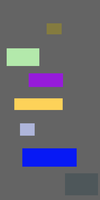

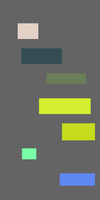

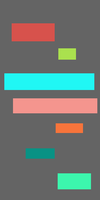

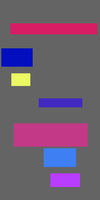

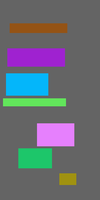


rico : higly aligned layouts


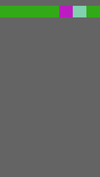

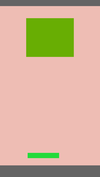

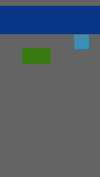

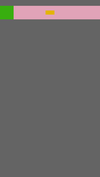

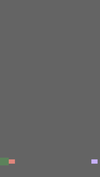

In [11]:
## display visuals

# training high/low : "synth2_train_low"
# training high/low : "synth2_train_high"
# metrics high/low : "rico_align_low"
# metrics high/low : "rico_align_high"
# metrics high/low : "rico_over_low"
# metrics high/low : "rico_over_high"
# metrics high/low : "synth2_div_low"
# metrics high/low : "synth2_div_high"
# different nb of assets : "synth2_nassets_3"
# different nb of assets : "synth2_nassets_5"
# different nb of assets : "synth2_nassets_7"

print("synth2 : 7-assets layouts")
display_images(apreal("synth2_nassets_7"),300,600,5)
print("")

print("rico : highly aligned layouts")
display_images(apreal("rico_align_high"),1440,2560,5)
print("")